In [30]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML

In [31]:
IMAGE_SIZE = 256
CHANNELS = 3

In [32]:
# train data loading, augmentation using image data generator api
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True
)
train_generator = train_datagen.flow_from_directory(
        'dataset/train',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse",
)

Found 141 images belonging to 9 classes.


In [33]:
train_generator.class_indices

{'algal_leaf_spot': 0,
 'alphids': 1,
 'blister_blight': 2,
 'brown_gray': 3,
 'healthy': 4,
 'leaf_miner': 5,
 'mosquito': 6,
 'redleaf_spot': 7,
 'redscab': 8}

In [34]:
class_names = list(train_generator.class_indices.keys())
class_names

['algal_leaf_spot',
 'alphids',
 'blister_blight',
 'brown_gray',
 'healthy',
 'leaf_miner',
 'mosquito',
 'redleaf_spot',
 'redscab']

In [35]:
count=0
for image_batch, label_batch in train_generator:
#     print(label_batch)
    print(image_batch[0])
    break
#     count+=1
#     if count>2:
#         break

[[[0.4885008  0.52771646 0.49634394]
  [0.47602463 0.5152403  0.48386776]
  [0.44557187 0.48522604 0.45473036]
  ...
  [0.36078432 0.50830996 0.04911312]
  [0.3583886  0.5074082  0.04074154]
  [0.3521351  0.5011547  0.02976033]]

 [[0.5846874  0.6239031  0.59253055]
  [0.57320935 0.612425   0.5810525 ]
  [0.56079066 0.60000634 0.5686338 ]
  ...
  [0.36078432 0.50880903 0.04711693]
  [0.35788956 0.5069092  0.04024249]
  [0.351137   0.50015664 0.02776415]]

 [[0.6761337  0.7158452  0.6844727 ]
  [0.66267216 0.70188785 0.6705153 ]
  [0.65119404 0.6904097  0.6590372 ]
  ...
  [0.36078432 0.5093081  0.04512075]
  [0.35739052 0.5064102  0.03974345]
  [0.3501389  0.49915853 0.02576797]]

 ...

 [[0.14057806 0.21659453 0.0949297 ]
  [0.15864791 0.22299533 0.10873573]
  [0.19769573 0.26044083 0.15678208]
  ...
  [0.79694265 0.71937555 0.37251642]
  [0.7979408  0.7213717  0.37700784]
  [0.7989389  0.72336787 0.38149926]]

 [[0.14506948 0.21958882 0.10191635]
  [0.1606441  0.22349438 0.10973381]


In [36]:
validation_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)
validation_generator = validation_datagen.flow_from_directory(
        'dataset/val',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 16 images belonging to 9 classes.


In [37]:
# test data loading, augmentation using image data generator api
test_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)

test_generator = test_datagen.flow_from_directory(
        'dataset/test',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 49 images belonging to 9 classes.


In [38]:
for image_batch, label_batch in test_generator:
    print(image_batch[0])
    break

[[[0.5693896  0.6383981  0.5568628 ]
  [0.56887376 0.6376244  0.5568628 ]
  [0.56835794 0.6368507  0.5568628 ]
  ...
  [0.32481143 0.42677224 0.2424585 ]
  [0.3322609  0.4363666  0.2509804 ]
  [0.33473158 0.4445355  0.25630018]]

 [[0.57254905 0.64780396 0.5545294 ]
  [0.57254905 0.64728814 0.55478734]
  [0.57254905 0.64677244 0.55504525]
  ...
  [0.32558513 0.4275459  0.24323219]
  [0.33200303 0.43662447 0.2509804 ]
  [0.33602104 0.44582495 0.25758964]]

 [[0.56789935 0.6463308  0.5482915 ]
  [0.5684151  0.6468465  0.54880726]
  [0.5689309  0.6473623  0.5493231 ]
  ...
  [0.3263588  0.4283196  0.24400587]
  [0.33174512 0.43688238 0.2509804 ]
  [0.33731052 0.44711444 0.25887913]]

 ...

 [[0.5101074  0.6826564  0.29834267]
  [0.5040818  0.6712291  0.29051653]
  [0.50016874 0.659161   0.29523495]
  ...
  [0.32087448 0.37185487 0.2966509 ]
  [0.3203587  0.37133908 0.2956193 ]
  [0.3198429  0.3708233  0.29458776]]

 [[0.5095916  0.6821406  0.2978269 ]
  [0.50382394 0.67019755 0.29000074]


In [39]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 9

model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(32, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

In [40]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 30, 30, 64)      

In [41]:
# compile 
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [42]:
# model training
history = model.fit(
    train_generator,
    steps_per_epoch=4,
    batch_size=32,
    validation_data=validation_generator,
    validation_steps=1,
    verbose=1,
    epochs=100,
)

Epoch 1/100
4/4 [==============================] - 12s 3s/step - loss: 2.1343 - accuracy: 0.2477 - val_loss: 1.8810 - val_accuracy: 0.3125
Epoch 2/100
4/4 [==============================] - 12s 3s/step - loss: 2.0137 - accuracy: 0.2656 - val_loss: 1.7820 - val_accuracy: 0.3125
Epoch 3/100
4/4 [==============================] - 12s 3s/step - loss: 1.9461 - accuracy: 0.2656 - val_loss: 1.6248 - val_accuracy: 0.3125
Epoch 4/100
4/4 [==============================] - 10s 3s/step - loss: 1.9172 - accuracy: 0.2569 - val_loss: 1.6841 - val_accuracy: 0.3125
Epoch 5/100
4/4 [==============================] - 11s 3s/step - loss: 1.8774 - accuracy: 0.3028 - val_loss: 1.6230 - val_accuracy: 0.3125
Epoch 6/100
4/4 [==============================] - 11s 3s/step - loss: 1.8613 - accuracy: 0.2569 - val_loss: 1.5527 - val_accuracy: 0.3125
Epoch 7/100
4/4 [==============================] - 13s 3s/step - loss: 1.8440 - accuracy: 0.2656 - val_loss: 1.6157 - val_accuracy: 0.3125
Epoch 8/100
4/4 [==========

In [43]:
scores = model.evaluate(test_generator)

2/2 [==============================] - 2s 421ms/step - loss: 3.3017 - accuracy: 0.5102


In [44]:
scores

[3.301691770553589, 0.5102040767669678]

In [45]:
history

In [46]:
history.params

{'verbose': 1, 'epochs': 100, 'steps': 4}

In [47]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [48]:
type(history.history['loss'])

list

In [49]:
len(history.history['loss'])

100

In [50]:
history.history['loss'][:5]

[2.1343255043029785,
 2.013666868209839,
 1.946079134941101,
 1.917229175567627,
 1.8773730993270874]

In [51]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [52]:
val_acc

[0.3125,
 0.3125,
 0.3125,
 0.3125,
 0.3125,
 0.3125,
 0.3125,
 0.4375,
 0.5,
 0.5625,
 0.5625,
 0.5625,
 0.5,
 0.5625,
 0.625,
 0.625,
 0.5,
 0.6875,
 0.5625,
 0.6875,
 0.6875,
 0.5625,
 0.4375,
 0.625,
 0.6875,
 0.6875,
 0.6875,
 0.75,
 0.625,
 0.6875,
 0.625,
 0.75,
 0.8125,
 0.75,
 0.875,
 0.875,
 0.8125,
 0.875,
 0.875,
 0.875,
 0.8125,
 0.9375,
 0.625,
 0.8125,
 0.6875,
 0.6875,
 0.875,
 0.625,
 0.875,
 0.875,
 0.875,
 0.8125,
 0.875,
 0.8125,
 0.875,
 0.8125,
 0.875,
 0.875,
 0.875,
 0.875,
 0.875,
 0.875,
 0.875,
 0.875,
 0.8125,
 0.875,
 0.875,
 0.875,
 0.8125,
 0.8125,
 0.8125,
 0.875,
 0.875,
 0.8125,
 0.875,
 0.75,
 0.875,
 0.75,
 0.875,
 0.875,
 0.8125,
 0.75,
 0.8125,
 0.8125,
 0.875,
 0.875,
 0.875,
 0.9375,
 0.8125,
 0.8125,
 0.875,
 0.875,
 0.875,
 0.875,
 0.9375,
 0.8125,
 0.75,
 0.75,
 0.75,
 0.875]

In [53]:
acc

[0.24770642817020416,
 0.265625,
 0.265625,
 0.2568807303905487,
 0.302752286195755,
 0.2568807303905487,
 0.265625,
 0.31192660331726074,
 0.35779815912246704,
 0.40366971492767334,
 0.3761467933654785,
 0.4403669834136963,
 0.44954127073287964,
 0.4403669834136963,
 0.47706422209739685,
 0.5137614607810974,
 0.5871559381484985,
 0.5596330165863037,
 0.5546875,
 0.4587155878543854,
 0.642201840877533,
 0.6171875,
 0.5596330165863037,
 0.60550457239151,
 0.6796875,
 0.6880733966827393,
 0.7339449524879456,
 0.6513761281967163,
 0.75,
 0.703125,
 0.7155963182449341,
 0.7706422209739685,
 0.7981651425361633,
 0.7798165082931519,
 0.8165137767791748,
 0.7981651425361633,
 0.8807339668273926,
 0.8899082541465759,
 0.890625,
 0.8899082541465759,
 0.90625,
 0.84375,
 0.8899082541465759,
 0.7798165082931519,
 0.8165137767791748,
 0.8348624110221863,
 0.752293586730957,
 0.8899082541465759,
 0.8623853325843811,
 0.8440366983413696,
 0.8807339668273926,
 0.9266055226325989,
 0.8807339668273926,

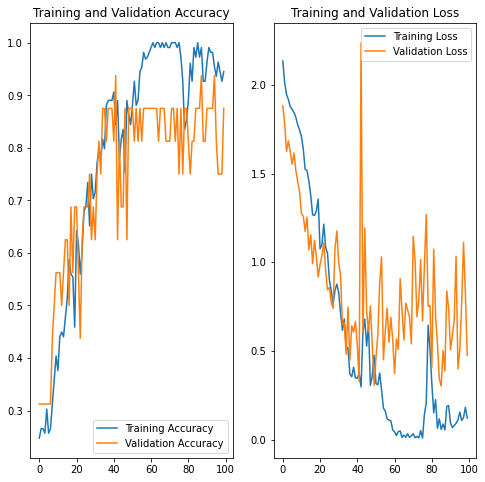

In [55]:
EPOCHS = 100

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [56]:
class_names = list(train_generator.class_indices.keys())
class_names

['algal_leaf_spot',
 'alphids',
 'blister_blight',
 'brown_gray',
 'healthy',
 'leaf_miner',
 'mosquito',
 'redleaf_spot',
 'redscab']

first image to predict
actual label: algal_leaf_spot
predicted label: brown_gray


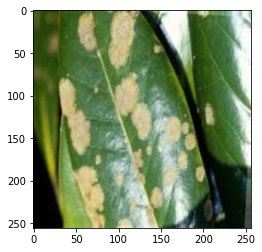

In [57]:
import numpy as np


for image_batch, label_batch in test_generator:
    first_image = image_batch[0]
    first_label = int(label_batch[0])
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(image_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])
    
    break

In [58]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

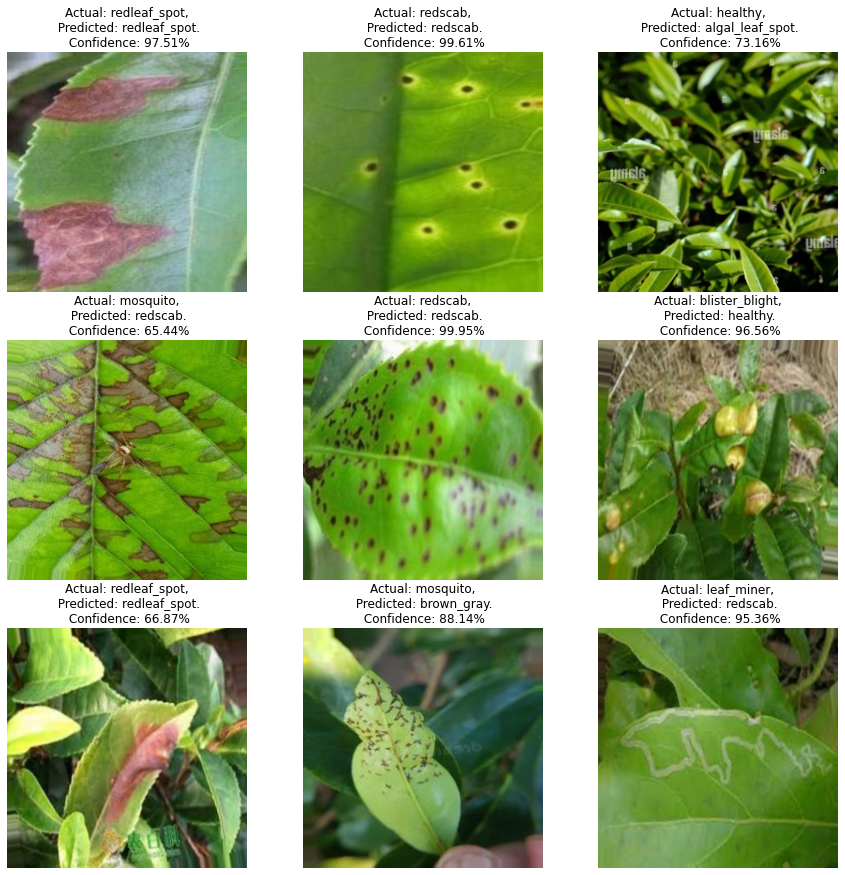

In [59]:
plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

In [83]:
model.save("../potatoes.h5")

In [86]:
import os
model_version=max([int(i) for i in os.listdir("../saved_models") + [0]])+1
model.save(f"../saved_models/{model_version}")

INFO:tensorflow:Assets written to: ../saved_models/1\assets
